In [1]:
import pandas as pd
import numpy as np
import matplotlib.style
import matplotlib.pyplot as plt
import yfinance as yf
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn-v0_8")
from itertools import product

In [2]:
symbol = "EURUSD=X"
start = "2023-01-01"
end = "2024-01-01"

In [4]:
df = yf.download(symbol, start, end, interval='1h').Close.to_frame()
df.rename(columns={"Close": "price"}, inplace=True)
df['returns'] = np.log(df['price'].div(df['price'].shift(1)))

[*********************100%%**********************]  1 of 1 completed


In [12]:
window = 3
df['position'] = np.sign(df['returns'].rolling(window=window).mean())
df['strategy'] = df.position.shift(1) * df.returns
df.dropna(inplace=True)
df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)
df

,price,returns,position,strategy,creturns,cstrategy
Datetime,,,,,,
2023-01-02 07:00:00+00:00,1.0681,-0.0005,-1.0000,0.0005,0.9995,1.0005
2023-01-02 08:00:00+00:00,1.0683,0.0001,-1.0000,-0.0001,0.9996,1.0004
2023-01-02 09:00:00+00:00,1.0681,-0.0001,-1.0000,0.0001,0.9995,1.0005
2023-01-02 10:00:00+00:00,1.0684,0.0002,1.0000,-0.0002,0.9997,1.0003
2023-01-02 11:00:00+00:00,1.0688,0.0004,1.0000,0.0004,1.0001,1.0007
...,...,...,...,...,...,...
2023-12-29 18:00:00+00:00,1.1055,-0.0013,1.0000,0.0013,1.0344,1.0100
2023-12-29 19:00:00+00:00,1.1044,-0.0010,-1.0000,-0.0010,1.0334,1.0090
2023-12-29 20:00:00+00:00,1.1044,0.0000,-1.0000,-0.0000,1.0334,1.0090


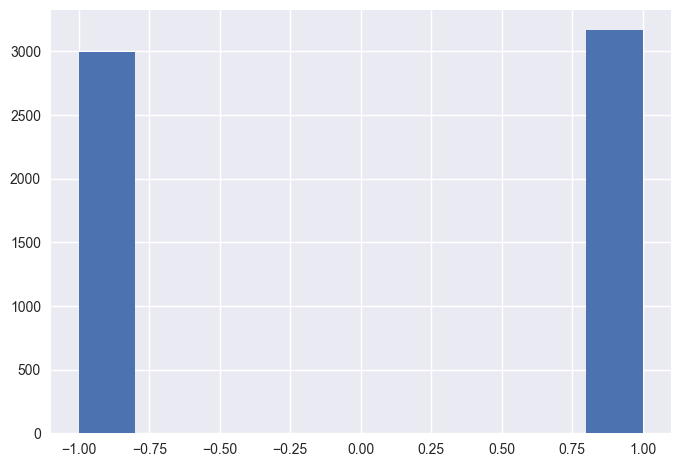

In [15]:
df.position.hist()
plt.show()

In [19]:
spread = 1.5 * 0.0001
halfspread = spread / 2

In [20]:
ptc = halfspread / df.price.mean()
ptc

np.float64(6.932221317949238e-05)

In [25]:
df['trades'] = df.position.diff().fillna(0).abs()
df

,price,returns,position,strategy,creturns,cstrategy,position_diff,trades
Datetime,,,,,,,,
2023-01-02 07:00:00+00:00,1.0681,-0.0005,-1.0000,0.0005,0.9995,1.0005,0.0000,0.0000
2023-01-02 08:00:00+00:00,1.0683,0.0001,-1.0000,-0.0001,0.9996,1.0004,0.0000,0.0000
2023-01-02 09:00:00+00:00,1.0681,-0.0001,-1.0000,0.0001,0.9995,1.0005,0.0000,0.0000
2023-01-02 10:00:00+00:00,1.0684,0.0002,1.0000,-0.0002,0.9997,1.0003,2.0000,2.0000
2023-01-02 11:00:00+00:00,1.0688,0.0004,1.0000,0.0004,1.0001,1.0007,0.0000,0.0000
...,...,...,...,...,...,...,...,...
2023-12-29 18:00:00+00:00,1.1055,-0.0013,1.0000,0.0013,1.0344,1.0100,2.0000,2.0000
2023-12-29 19:00:00+00:00,1.1044,-0.0010,-1.0000,-0.0010,1.0334,1.0090,2.0000,2.0000
2023-12-29 20:00:00+00:00,1.1044,0.0000,-1.0000,-0.0000,1.0334,1.0090,0.0000,0.0000


In [26]:
df.trades.value_counts()

trades
0.0000    4483
2.0000    1679
1.0000       6
Name: count, dtype: int64

In [27]:
df['strategy_net'] = df.strategy - df.trades*ptc
df['cstrategy_net'] = df.strategy_net.cumsum().apply(np.exp)
df

,price,returns,position,strategy,creturns,cstrategy,position_diff,trades,strategy_net,cstrategy_net
Datetime,,,,,,,,,,
2023-01-02 07:00:00+00:00,1.0681,-0.0005,-1.0000,0.0005,0.9995,1.0005,0.0000,0.0000,0.0005,1.0005
2023-01-02 08:00:00+00:00,1.0683,0.0001,-1.0000,-0.0001,0.9996,1.0004,0.0000,0.0000,-0.0001,1.0004
2023-01-02 09:00:00+00:00,1.0681,-0.0001,-1.0000,0.0001,0.9995,1.0005,0.0000,0.0000,0.0001,1.0005
2023-01-02 10:00:00+00:00,1.0684,0.0002,1.0000,-0.0002,0.9997,1.0003,2.0000,2.0000,-0.0004,1.0002
2023-01-02 11:00:00+00:00,1.0688,0.0004,1.0000,0.0004,1.0001,1.0007,0.0000,0.0000,0.0004,1.0006
...,...,...,...,...,...,...,...,...,...,...
2023-12-29 18:00:00+00:00,1.1055,-0.0013,1.0000,0.0013,1.0344,1.0100,2.0000,2.0000,0.0012,0.8001
2023-12-29 19:00:00+00:00,1.1044,-0.0010,-1.0000,-0.0010,1.0334,1.0090,2.0000,2.0000,-0.0011,0.7991
2023-12-29 20:00:00+00:00,1.1044,0.0000,-1.0000,-0.0000,1.0334,1.0090,0.0000,0.0000,-0.0000,0.7991


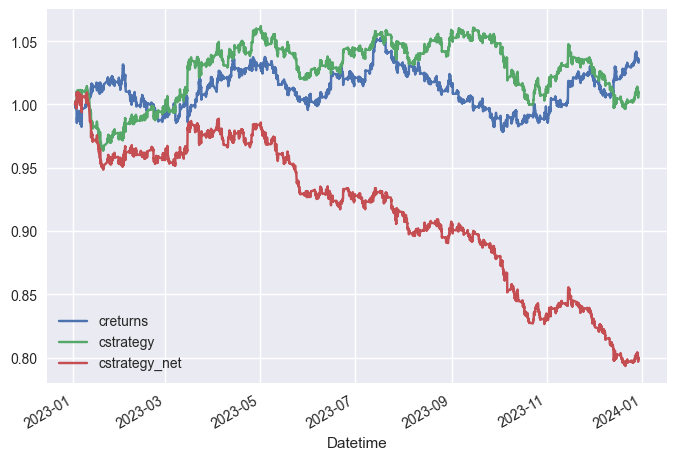

In [28]:
df[['creturns', 'cstrategy', 'cstrategy_net']].plot()
plt.show()